### **Знакомство с данными: винные обзоры**

После просмотра документального фильма о сомелье мы захотели создать прогностическую модель для оценки вин вслепую, как это делает сомелье.

Определив бизнес-задачу, мы перешли к сбору данных для обучения модели. После нескольких недель парсинга сайта *WineEnthusiast* нам удалось собрать около *130* тысяч строк обзоров вин для анализа и обучения.

Вот какие признаки нам удалось собрать:

<img src="images/Признаки.png">

Импортируем библиотеки, которые нам понадобятся (*Pandas* - для работы с данными, *Matplotlib* и *Seaborn* - для визуализации):

In [79]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем наш файл с винными обзорами и выведем первые пять строк таблицы с помощью метода **head(),** чтобы убедиться в том, что всё подгрузилось верно:

In [80]:
df_wine_reviews = pd.read_csv('data/wine.csv')
df_wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Дополнительно посмотрим на последние пять строк таблицы с помощью метода **tail():**

In [81]:
df_wine_reviews.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


Итак, файл прочитан. Далее займёмся анализом структуры собранных данных, но перед этим создадим копию *DataFrame* с помощью метода **copy():**

In [82]:
df_wine_reviews_1 = df_wine_reviews.copy()

**1.** Узнаем сколько всего дегустаторов приняло участие в винных обзорах?

In [83]:
# Чтобы правильно подсчитать количество дегустаторов, принявших участие в винных обзорах,
# воспользуемся функцией nunique(), которая возвращяет колличество уникальных значений
df_wine_reviews_1["taster_name"].nunique()

19

**2.** Найдем максимальную цену за бутылку в этом наборе данных?

In [84]:
# Bоспользуемся функцией max(), которая выведет масимальную цену за бутылку
df_wine_reviews_1["price"].max()

3300.0

**3.** Проанализируем представленный датасет и перечислим все числовые признаки через запятую.

In [85]:
df_wine_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Итак, и это: **points, price.**

[[<Axes: title={'center': 'points'}> <Axes: title={'center': 'price'}>]]


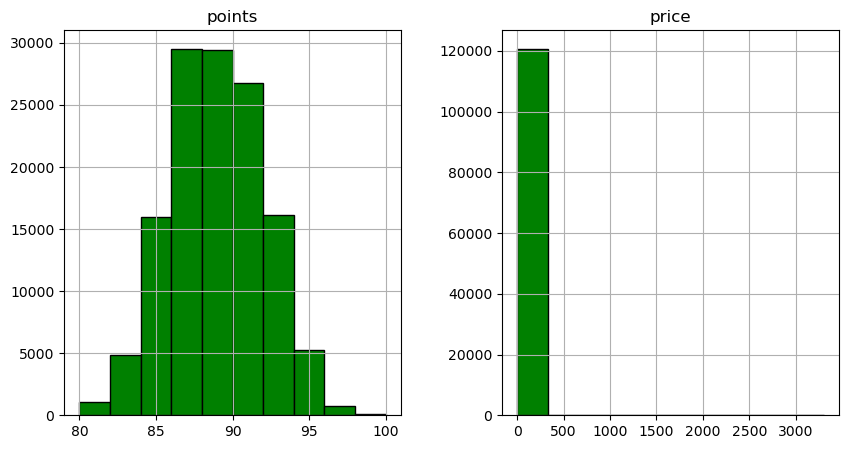

In [86]:
# Построим распеределение всех признаков с помощью визуализации
# Matplotlib histogram
hist = df_wine_reviews_1.hist(figsize=(10, 5), color = "green", edgecolor = "black")
print(hist)

**4.** Проанализируем датасет на наличие дублирующихся винных обзоров. Если дублирующиеся записи есть, удалим их.

* Создадим маску дубликатов с помощью метода *duplicated()* и произведём фильтрацию. Результат заносим в переменную *wine_reviews_duplicates*. Выведем число строк в результирующем *DataFrame*:

In [87]:
dupl_columns = list(df_wine_reviews_1.columns)
mask = df_wine_reviews_1.duplicated(subset=dupl_columns) # маска для фильтрации
wine_reviews_duplicates = df_wine_reviews_1[mask] # фильтруем наш датасет
print(f"Число найденных дубликатов: {wine_reviews_duplicates.shape[0]}")

Число найденных дубликатов: 9983


* Теперь нам необходимо избавиться от найденых дубликатов. Для этого легче всего воспользоваться методом *drop_duplicates()*, который удаляет повторяющиеся записи из таблицы. Создадим новую таблицу *wine_reviews_dedupped*, которая будет версией исходной таблицы, очищенной от полных дубликатов.

In [88]:
wine_reviews_dedupped = df_wine_reviews_1.drop_duplicates(subset=dupl_columns)
print(f"Результирующее число записей: {wine_reviews_dedupped.shape[0]}")

Результирующее число записей: 119988


**5.** Проверим датасет на наличие пропусков в данных.

В библиотеке *Pandas* специально для этого реализован метод *isnull()*.

In [89]:
display(df_wine_reviews_1.isnull().sum())

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

**6.** Обработаем пропущенные значения в наборе данных любым известным нам способом, который мы изучали в модуле *PYTHON-14. Очистка данных*.

*Воспользуемся правилами:*
* Если какой-то из признаков имеет более **30-40 %** пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей - к большой утрате данных.
* Заполним данные с умом! Если перед нами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.
* Мы можем оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число **-1,** а для категориальных - строку **unknown**.

**Подсказка**

Самым простым способом является удаление пропущенных значений либо заполнение их на значение вида **unknown** или на число **-1.**

Итак, одним из распространенных способов визуализации пропусков является *тепловая карта*, для создания которой можно воспользоваться результатом метода *isnull()*. Ячейки таблицы, в которых есть пропуск, будем отмечать *жёлтым цветом*, а остальные - *фиолетовым*. Для этого создадим собственную палитру цветов тепловой карты с помощью метода *color_pallete()* из библиотеки *seaborn*.

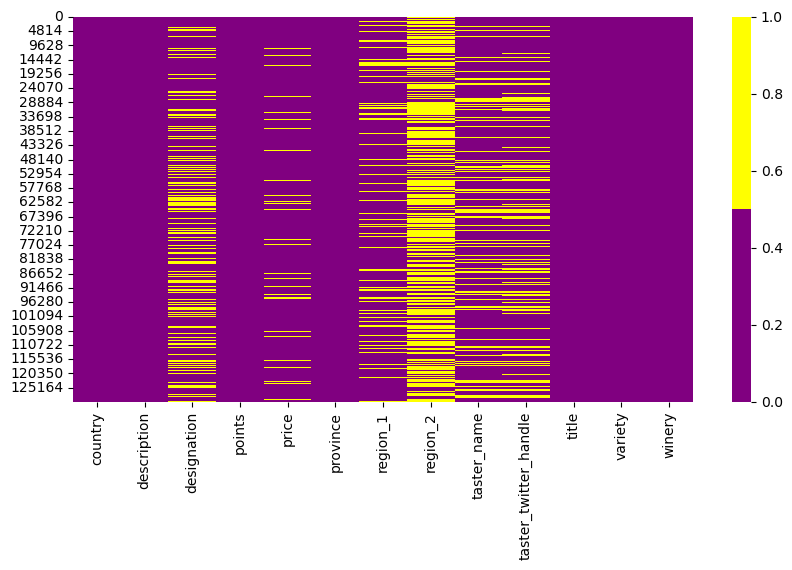

In [90]:
# Наглядная тепловая карта пропусков
colors = ["purple", "yellow"]
fig = plt.figure(figsize=(10, 5))
ax = sns.heatmap(
    df_wine_reviews_1.isnull(),
    cmap=sns.color_palette(colors),
)

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. Например, видно, что признак *region_2* имеет наибольшее количество пропусков, соотвественно необходимо избавиться от данного признака.

In [91]:
df_wine_reviews_1 = df_wine_reviews_1.drop(["region_2"], axis=1)

Теперь посмотрим, какие признаки остались после удаления признака *region_2* с наибольшим количеством пропусков.

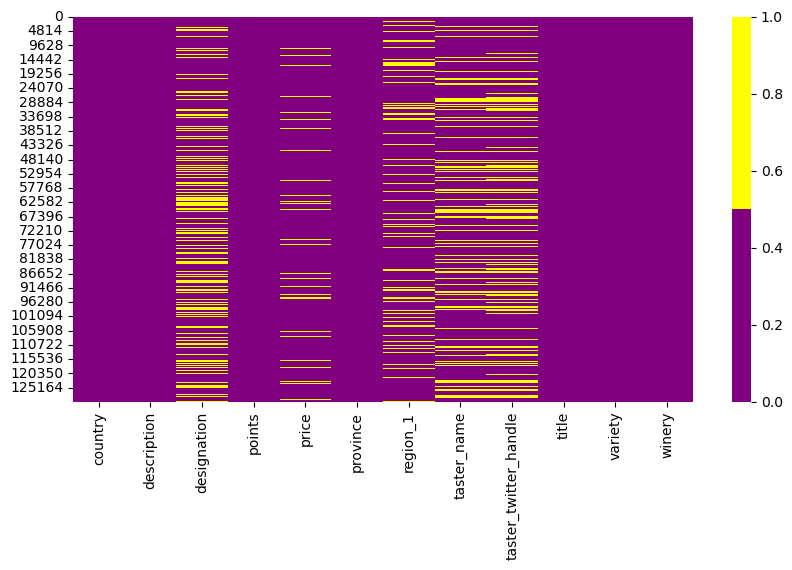

In [92]:
# Наглядная тепловая карта пропусков
colors = ["purple", "yellow"]
fig = plt.figure(figsize=(10, 5))
ax = sns.heatmap(
    df_wine_reviews_1.isnull(),
    cmap=sns.color_palette(colors),
)

Выведем первые пять строк таблицы с помощью метода **head():**

In [93]:
df_wine_reviews_1.head()

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Понимание данных с помощью метода *describe()*:

In [94]:
df_wine_reviews_1.describe(include='all')

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,103727,98758,129971,129970,129971
unique,43,119955,37979,NaN,NaN,425,1229,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так как категориальные признаки заполняются либо модальным значением, либо, если хочется оставить информацию о пропуске в данных, значением *unknown*, что мы и сделаем.

In [95]:
# Заполнение пропусков в категориальных признаках самым простым способом, т.е. замена их на значение вида "unknown".
df_wine_reviews_1["designation"] = df_wine_reviews_1["designation"].fillna("unknown")
df_wine_reviews_1["region_1"] = df_wine_reviews_1["region_1"].fillna("unknown")
df_wine_reviews_1["taster_name"] = df_wine_reviews_1["taster_name"].fillna("unknown")
df_wine_reviews_1["taster_twitter_handle"] = df_wine_reviews_1["taster_twitter_handle"].fillna("unknown")

# Признаки с маленьким количеством пропусков заменим на самые частовстречающиеся значения
df_wine_reviews_1["country"] = df_wine_reviews_1["country"].fillna("US")
df_wine_reviews_1["price"] = df_wine_reviews_1["price"].fillna(df_wine_reviews_1["price"].mean())
df_wine_reviews_1["province"] = df_wine_reviews_1["province"].fillna("California")
df_wine_reviews_1["variety"] = df_wine_reviews_1["variety"].fillna("Pinot Noir")

Понимание данных с помощью метода *info()*:

In [96]:
df_wine_reviews_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129971 non-null  object 
 1   description            129971 non-null  object 
 2   designation            129971 non-null  object 
 3   points                 129971 non-null  int64  
 4   price                  129971 non-null  float64
 5   province               129971 non-null  object 
 6   region_1               129971 non-null  object 
 7   taster_name            129971 non-null  object 
 8   taster_twitter_handle  129971 non-null  object 
 9   title                  129971 non-null  object 
 10  variety                129971 non-null  object 
 11  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


Удостоверимся, что теперь пропуски отсутствуют.

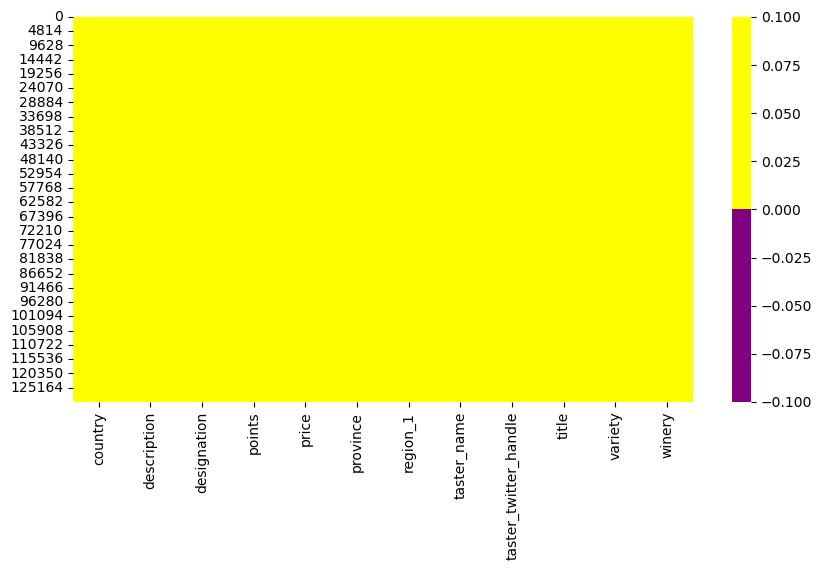

In [97]:
# Наглядная тепловая карта без пропусков
colors = ["purple", "yellow"]
fig = plt.figure(figsize=(10, 5))
ax = sns.heatmap(
    df_wine_reviews_1.isnull(),
    cmap=sns.color_palette(colors),
)

Сохраняем очищенные данные для дальнейшей работы.

In [98]:
df_wine_reviews_1 = df_wine_reviews_1.to_csv('data/wine_reviews_cleared.csv', index=False)